## EPFL Oblique

In [1]:
import os
import numpy as np
import torch
import matplotlib.pyplot as plt
from scipy.spatial import distance

In [2]:
pose_dir = '/Users/felicity/Desktop/Super-resolution-drones-depth-images/ICCV2019/EPFL_10_newsample_ob/poses/'
# pose_dir = '/Users/felicity/Desktop/TOPO/EPFL_10_sample_nadir/poses/'
_files = os.listdir(pose_dir)
_files.sort()
_pose_files = [pose_dir + f for f in _files]
_pose_files.sort()

init_dir = '/Users/felicity/Desktop/Super-resolution-drones-depth-images/ICCV2019/EPFL_10_newsample_ob/init/'
# init_dir = '/Users/felicity/Desktop/TOPO/EPFL_10_sample_nadir/init/'
_datfiles = os.listdir(init_dir)
_datfiles.sort()
_init_files = [init_dir + f for f in _datfiles]
_init_files.sort()

In [4]:
len(_init_files)

25

In [ ]:
dist_dir = '/Users/felicity/Desktop/Super-resolution-drones-depth-images/ICCV2019/EPFL_10_newsample_ob/dist/'
# dist_dir = '/Users/felicity/Desktop/TOPO/EPFL_10_sample_nadir/dist/'
for num in range(len(_init_files)):
    pose = np.loadtxt(pose_dir + _files[num])
    cam_in_world = np.dot(pose,[0,0,0,1])
    cam_in_world = cam_in_world[:-1]

    init = torch.load(init_dir + _datfiles[num])
    dist = torch.zeros(init.size(1), init.size(2))
    for row in range(init.size(1)):
        for col in range(init.size(2)):
            dist[row,col] = distance.euclidean(init[:,row,col], cam_in_world)
    torch.save(dist, dist_dir+_datfiles[num])
    

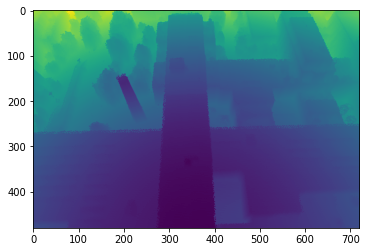

In [5]:
plt.imshow(dist)

In [6]:
print(init[0].min())
print(init[0].max())
print(init[1].min())
print(init[1].max())
print(init[2].min())
print(init[2].max())


tensor(-174.9437)
tensor(-67.4437)
tensor(65.8137)
tensor(244.0012)
tensor(135.8717)
tensor(223.3717)


In [7]:
print(init.min())
print(init.max())
print(dist.min())
print(dist.max())

tensor(-174.9437)
tensor(244.0012)
tensor(70.4355)
tensor(179.6637)
